# Hydra challenge entries

The following code provides an overview of the data submitted to the challenge. The information about the participants has not been included so far, and only a simple number is provided to distinguish them.

This code will be regularly updated to facilitate analysis.

In [158]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

ref_entry=np.zeros(50)

# hardcoded data taken from the comments
ref_entry[20]=3850.0
ref_entry[17]=3657
ref_entry[32]=3672
ref_entry[27]=3732.4
ref_entry[11]=3657
ref_entry[7]=3859
ref_entry[16]=3656.8
ref_entry[17]=3657
#ref_entry[19]=3785
ref_entry[21]=3642.7
ref_entry[31]=3700
ref_entry[30]=3691
ref_entry[24]=3657.4
ref_entry[23]=3657
ref_entry[15]=3657
ref_entry[13]=3691.7
ref_entry[5]=3810.7
ref_entry[33]=3614.7

ref_water=3657
ref_train=np.array([3538,3536,3647,3620,3458,3524,3623,3484,3595,3548])
ref_test=np.array([3503,3492,3591,3524,3597,3454,3491,3507,3611,3649])
ref_shifts_train=ref_water-ref_train
ref_shifts_test=ref_water-ref_test
labels_train=['ACE','APH','ANL','CBU','DBF','DBN','IMZ','OCP','POH','TFB']
labels_test=['CON','DMI','FAH','MLA','PCD','PYR','THF','THT','TPH','TFE']


data_train=[]
data_test=[]
uncertainty_train=[]
uncertainty_test=[]

entries = [dir for dir in os.listdir('data/') if not dir.startswith('.')]
entries.sort()

for entry in entries:
    print('\n Entry='+entry)
    jsonFile=os.getcwd()+'/data/'+entry+'/data.json'
    file = open(jsonFile)
    data = json.load(file)
    
    vtrain=[]
    utrain=[]
    for system in data["Training"]:
        vtrain.append(data["Training"][system]["Global minimum OHb wavenumber"])
        utrain.append(data["Training"][system]["Uncertainty"])
    
    data_train.append(vtrain)
    uncertainty_train.append(utrain)
    vtest=[]
    utest=[]
    for system in data["Test"]:
        vtest.append(data["Test"][system]["Global minimum OHb wavenumber"])
        utest.append(data["Test"][system]["Uncertainty"])
    data_test.append(vtest)
    uncertainty_test.append(utest)
    print(vtrain)
    print(vtest)


 Entry=05
[3646.7, None, 3654.8, None, 3768.8, None, 3609.3, 3695.6, None, 3806.7]
[3659.4, 3611.8, 3720, 3659.9, 3621.2, 3549.1, 3611.2, 3589.3, 3735.8, 3762.3]

 Entry=07
[None, None, None, None, None, None, None, None, None, None]
[3621, 3611, 3731, 3571, None, 3548, 3629, 3631, 3790, 3843]

 Entry=11
[3537, 3534, 3523, 3551, 3623, 3658, 3468, 3578, 3659, 3659]
[3536, 3520, 3589, 3530, 3633, 3467, 3531, 3514, 3616, 3653]

 Entry=13
[3558.1, 3668.3, 3529.5, 3298, 3678.6, 3457.5, 3398.2, 3716.4, 3633.5, 3639.7]
[3077.2, 3472.1, 3785.1, 3536.4, 3663.6, 3532.3, 3706.3, 3710.3, 3890.7, 3568.9]

 Entry=15
[None, None, None, None, None, None, None, None, None, None]
[3542.9, 3506.5, 3586.4, 3425.4, 3547.6, 3388.7, 3492.4, 3594.6, 3587.2, 3482.6]

 Entry=16
[3529, 3524, 3492, 3542, 3608, 3507, 3432, 3586, 3625, 3658]
[3500, 3497, 3589, 3515, 3604, 3418, 3490, 3498, 3601, 3655]

 Entry=17
[3533, 3531, 3523, 3549, 3623, None, 3462, 3593, 3635, 3652]
[3510, 3507, 3589, 3532, 3621, 3454, 3507,

The data for all the different entries is shown above. The lists containing the data are:
* `data_train` stores the wavenumbers for the training set molecules
* `data_test` stores the wavenumbers for the test set molecules
* `uncertainty_train` stores the uncertainty for the training set molecules
* `uncertainty_test` stores the uncertainty for the test set molecules
* `entries` keeps the number of each entry
* `ref_entry` keeps the reference symmetric OH stretch of water value for each entry (indexed to `entries`)

The code below is an example of how the data can be plotted or manipulated. In this case, one is calculating the deviation of the submitted shifts for both training and test set and plotting the test set deviations.

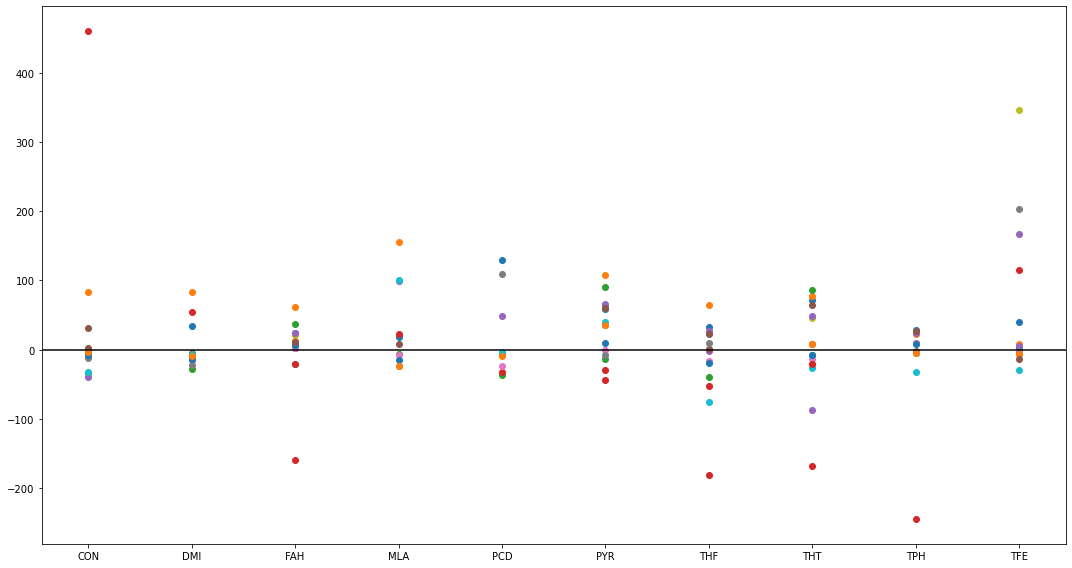

In [157]:
data_train=np.array(data_train, dtype=float)
data_test=np.array(data_test, dtype=float)

counter=0
shifts_test=np.full_like(data_test, 0)
shifts_train=np.full_like(data_train, 0)
for entry in entries:
    ind=int(entry)
    shifts_test[counter]=ref_entry[ind]-data_test[counter]
    shifts_train[counter]=ref_entry[ind]-data_train[counter]
    counter+=1
    
deviations_test=shifts_test-ref_shifts_test
deviations_train=shifts_train-ref_shifts_train

index=np.array(range(0,len(labels_test)))

plt.rcParams['figure.figsize'] = [15, 8]

plt.rcParams.update({'figure.autolayout': True})
ax = plt.axes()
plt.axhline(y=0.0, color='k', linestyle='-')
for row in deviations_test:
    plt.scatter(index,row)
#plt.ylim(-50,50)
ax.set_xticks(index)
ax.set_xticklabels(labels_test)
plt.show()